In [41]:
%pylab inline
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import time

data = []
datapath = '/home/bigdatas16/1101.csv'
data = pd.read_csv(datapath)
def MA(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    for i in dataList:
        if i - day + 1 >= 0:
            # 移動平均數 = 採樣天數的股價合計 / 採樣天數
            tmp = data['Close'][i-day+1:i+1].mean()
            tmpList.append(tmp)
        elif i - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    data['MA'+str(day)]=tmpSeries
# 乖離率(BIAS)
def BIAS_lag(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    tmpList.append(0)
    for item in dataList:
        if item-day+1 >= 0:
            tmp = (data['Close'][item]-data['MA'+str(day)][item])/(data['MA'+str(day)][item])*100
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)         
    tmpSeries = pd.Series(tmpList)
    data['BIAS'+str(day)] = tmpSeries

start = time.time() 

for i in range(24):
    MA(data,1+i)
    BIAS_lag(data,1+i)    
    
def WMS_lag(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    tmpList.append(0)
    for item in dataList:
        if item - day + 1 >= 0:
            tmp = 100*(data['High'][item-day+1:item+1].max() - data['Close'][item])/(data['High'][item-day+1:item+1].max() - data['Low'][item-day+1:item+1].min())
            tmpList.append(tmp)
        elif item - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    data['WMS' + str(day) +'_lag'] = tmpSeries
def MA(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    tmpList.append(0)
    for i in dataList:
        if i - day + 1 >= 0:
            tmp = data['Close'][i-day+1:i+1].mean()
            tmpList.append(tmp)
        elif i - day + 1 < 0:
            tmp = 0
            tmpList.append(tmp)
    tmpSeries = pd.Series(tmpList)
    data['MA'+str(day)]=tmpSeries
    
# Close Rise Ratio 漲幅比
def RR(data):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)

    for item in dataList:
        # 防止 第一筆data沒有更舊的
        if item - 1 >=0:
            # (今日收盤價 - 昨日收盤價)/昨日收盤價
            tmp = (data['Close'][item]-data['Close'][item-1])/data['Close'][item-1]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    # create  RR 欄位
    data['RR']=tmpSeries
RR(data)
# 相對強弱指標(RSI) 建議6
def RSI(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            # 6日RSI=100*6日內收盤上漲總幅度平均值 / (6日內收盤上漲總幅度平均值 - 6日內收盤下跌總幅度平均值)   
            bolRise = data['RR'][item-day+1-1:item+1-1] > 0
            #print(bolRise)
            meanRise = data['RR'][item-day+1-1:item+1-1][bolRise].mean()
            
            if meanRise > 0:
                meanRise = meanRise
            else:
                meanRise = 0
                
            bolDesc = data['RR'][item-day+1-1:item+1-1] < 0
            #print(bolDesc)
            meanDesc = data['RR'][item-day+1-1:item+1-1][bolDesc].mean() 
                
            if meanDesc < 0:
                meanDesc = meanDesc
            else:
                meanDesc = 0
                
            #print(meanRise) 
            #print(meanDesc)

            if meanRise == 0 and meanDesc == 0:
                tmp = 0.50
            else:    
                tmp = 100 * ((meanRise*1.0) / (meanRise - meanDesc))
            #print(tmp)
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  RSI 欄位
    data['RSI'+str(day)] = tmpSeries

# High Rise Ratio 漲幅比
def RR_H(data):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)

    for item in dataList:
        # 防止 第一筆data沒有更舊的
        if item - 1 >=0:
            # (今日收盤價 - 昨日收盤價)/昨日收盤價
            tmp = (data['High'][item]-data['High'][item-1])/data['High'][item-1]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    # create  RR 欄位
    data['RR_H']=tmpSeries
RR_H(data)
# 相對強弱指標(RSI) 建議6
def RSI_H(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            bolRise = data['RR_H'][item-day+1-1:item+1-1] > 0
            #print(bolRise)
            meanRise = data['RR_H'][item-day+1-1:item+1-1][bolRise].mean()
            
            if meanRise > 0:
                meanRise = meanRise
            else:
                meanRise = 0
                
            bolDesc = data['RR_H'][item-day+1-1:item+1-1] < 0
            #print(bolDesc)
            meanDesc = data['RR_H'][item-day+1-1:item+1-1][bolDesc].mean() 
                
            if meanDesc < 0:
                meanDesc = meanDesc
            else:
                meanDesc = 0
                
            #print(meanRise) 
            #print(meanDesc)

            if meanRise == 0 and meanDesc == 0:
                tmp = 0.50
            else:    
                tmp = 100 * ((meanRise*1.0) / (meanRise - meanDesc))
            #print(tmp)
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  RSI 欄位
    data['RSI_H'+str(day)] = tmpSeries
    
# Volumn_n Rise Ratio 漲幅比
def RR_V(data):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)

    for item in dataList:
        # 防止 第一筆data沒有更舊的
        if item - 1 >=0:
            # (今日收盤價 - 昨日收盤價)/昨日收盤價
            tmp = (data['Volume_m'][item]-data['Volume_m'][item-1])/data['Volume_m'][item-1]*100
            tmpList.append(tmp)
        elif item - 1 < 0:
            tmp = 0
            tmpList.append(tmp)
        
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    # create  RR 欄位
    data['RR_V']=tmpSeries
RR_V(data)   
# 相對強弱指標(RSI) 建議6
def RSI_V(data,day):
    dataList = range(data['Date'].size)
    tmpList = []
    #tmpList.append(0)
    for item in dataList:
        # 防止前day沒有data
        if item - day >= 0:
            # 6日RSI=100*6日內收盤上漲總幅度平均值 / (6日內收盤上漲總幅度平均值 - 6日內收盤下跌總幅度平均值)   
            bolRise = data['RR_V'][item-day+1-1:item+1-1] > 0
            #print(bolRise)
            meanRise = data['RR_V'][item-day+1-1:item+1-1][bolRise].mean()
            
            if meanRise > 0:
                meanRise = meanRise
            else:
                meanRise = 0
                
            bolDesc = data['RR_V'][item-day+1-1:item+1-1] < 0
            #print(bolDesc)
            meanDesc = data['RR_V'][item-day+1-1:item+1-1][bolDesc].mean() 
                
            if meanDesc < 0:
                meanDesc = meanDesc
            else:
                meanDesc = 0
                
            #print(meanRise) 
            #print(meanDesc)

            if meanRise == 0 and meanDesc == 0:
                tmp = 0.50
            else:    
                tmp = 100 * ((meanRise*1.0) / (meanRise - meanDesc))
            #print(tmp)
            tmpList.append(tmp)
            
        elif item - day < 0:
            tmp = 0
            tmpList.append(tmp)              
    # 前day 沒data會出現NA
    tmpSeries = pd.Series(tmpList)
    
    # create  RSI 欄位
    data['RSI_V'+str(day)] = tmpSeries

def Cl_move_1(data):
    dataList = range(data['Date'].size)
    List = []
    List.append(0)
    for i in dataList:
        tmp = data['Close'][i]
        List.append(tmp)
    tmpSeries = pd.Series(List)
    data['Close1']=tmpSeries
Cl_move_1(data)    
    
for i in range(2,18):
    RSI(data,i) 
for i in range(2,18):
    RSI_V(data,i) 
for i in range(2,18):
    RSI_H(data,i) 
for i in range(5,65,5):
    MA(data,i)
for i in range(5,65,5):
    data["MA"+str(i)+"cross"] = data["Close1"][i:] - data["MA"+str(i)][i:]      
for i in range(5,60,5):
    data[("MA"+str(i))+("-MA"+str(i+5))] = data["MA"+str(i)][(i):] - data["MA" + str(5+i)][(i+5):]  
for i in range(18):
    WMS_lag(data,i+2)           
end = time.time()
print "Time taken = %f second"%(end - start)  
    
data = data.drop(data.index[4620])
def UP_DOWN(data):
    data_day_number = range(data['Date'].size)
    tmpList = []
    
    for item in data_day_number:
        spread = data['Close'][item] - data['Open'][item]
        if spread > 0 :
            tmp = 1
        elif spread <= 0:
            tmp = 0
 
        tmpList.append(tmp)
    
    tmpSeries = pd.Series(tmpList)
    data['UP_DOWN']=tmpSeries
UP_DOWN(data)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Time taken = 1077.048409 second


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4619
Columns: 159 entries, Date to UP_DOWN
dtypes: float64(157), int64(1), object(1)
memory usage: 5.6+ MB


In [43]:
data1 = data[['UP_DOWN','MA50cross','MA10cross','MA40cross','MA55cross','MA50-MA55'
              ,'MA15-MA20','MA25-MA30','MA30-MA35','WMS15_lag','WMS6_lag' ,'WMS12_lag'
              ,'WMS10_lag','WMS2_lag','WMS13_lag','WMS3_lag','WMS17_lag','RSI10','RSI2'
              ,'RSI_H7','RSI_H15','RSI_H8','RSI16','RSI6','RSI8','RSI_H4','RSI_H2'
              ,'RSI_V7','RSI15','RSI17','RSI_V11','RSI_H6'
              ,'BIAS16','BIAS19','BIAS23','BIAS1','BIAS6']]

In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 4619
Data columns (total 37 columns):
UP_DOWN      4620 non-null int64
MA50cross    4570 non-null float64
MA10cross    4610 non-null float64
MA40cross    4580 non-null float64
MA55cross    4565 non-null float64
MA50-MA55    4565 non-null float64
MA15-MA20    4600 non-null float64
MA25-MA30    4590 non-null float64
MA30-MA35    4585 non-null float64
WMS15_lag    4620 non-null float64
WMS6_lag     4620 non-null float64
WMS12_lag    4620 non-null float64
WMS10_lag    4620 non-null float64
WMS2_lag     4620 non-null float64
WMS13_lag    4620 non-null float64
WMS3_lag     4620 non-null float64
WMS17_lag    4620 non-null float64
RSI10        4620 non-null float64
RSI2         4620 non-null float64
RSI_H7       4620 non-null float64
RSI_H15      4620 non-null float64
RSI_H8       4620 non-null float64
RSI16        4620 non-null float64
RSI6         4620 non-null float64
RSI8         4620 non-null float64
RSI_H4       4620 no

In [45]:
data1 = data1.fillna(-1)
cols = data1.columns.tolist()
cols[0]

'UP_DOWN'

In [46]:
#data1 = data1.fillna(-1)
#cols = data1.columns.tolist()
#cols[24]
#data1 = data1[[cols[24]] + cols[0:23]]
n = len(data['Date'])/5
m = len(data['Date']) - n
train_data = data1.iloc[:m,:]

hyperparametr tuning cross validation 5 folds

In [47]:
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
import time 
sql_sc = SQLContext(sc)
train_data.iloc[:(m/5),:]
train_data.iloc[(m/5):(2*m/5),:]
train_data.iloc[(2*m/5):(3*m/5),:]
train_data.iloc[(3*m/5):(5*m/5),:]
train_data.iloc[(4*m/5):m,:]

cross_data_list = [i for i in range(1,6)]
cross_data_list[0] = train_data.iloc[:(m/5),:]
cross_data_list[1] = train_data.iloc[(m/5):(2*m/5),:]
cross_data_list[2] = train_data.iloc[(2*m/5):(3*m/5),:]
cross_data_list[3] = train_data.iloc[(3*m/5):(5*m/5),:]
cross_data_list[4] = train_data.iloc[(4*m/5):m,:]
cross_data_pandas = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_data_pandas[i] = pd.DataFrame(cross_data_list[i])
#cross_data_pandas[4]

cross_sql = [i for i in range(1,6)]
for i in range(0,5,1):
    cross_sql[i] = sql_sc.createDataFrame(cross_data_pandas[i])


assembler1 = VectorAssembler(inputCols=['MA50cross','MA10cross','MA40cross','MA55cross','MA50-MA55'
                                       ,'MA15-MA20','MA25-MA30','MA30-MA35','WMS15_lag','WMS6_lag' ,'WMS12_lag'
                                       ,'WMS10_lag','WMS2_lag','WMS13_lag','WMS3_lag','WMS17_lag','RSI10','RSI2'
                                       ,'RSI_H7','RSI_H15','RSI_H8','RSI16','RSI6','RSI8','RSI_H4','RSI_H2'
                                       ,'RSI_V7','RSI15','RSI17','RSI_V11','RSI_H6'
                                       ,'BIAS16','BIAS19','BIAS23','BIAS1','BIAS6'],outputCol="features")
for i in range(0,5,1):
    cross_sql[i] = assembler1.transform(cross_sql[i])
    
frames = [i for i in range(1,6)]
for i in range(0,5):
    #print(i)
    frames[i] = pd.concat([cross_data_pandas[(i+1)%5],cross_data_pandas[(i+2)%5],cross_data_pandas[(i+3)%5],cross_data_pandas[(i+4)%5]])
    result_sql = [i for i in range(1,6)]

for i in range(0,5):   
    result_sql[i] = sql_sc.createDataFrame(frames[i])   
    
assembler1 = VectorAssembler(inputCols=['MA50cross','MA10cross','MA40cross','MA55cross','MA50-MA55'
                                       ,'MA15-MA20','MA25-MA30','MA30-MA35','WMS15_lag','WMS6_lag' ,'WMS12_lag'
                                       ,'WMS10_lag','WMS2_lag','WMS13_lag','WMS3_lag','WMS17_lag','RSI10','RSI2'
                                       ,'RSI_H7','RSI_H15','RSI_H8','RSI16','RSI6','RSI8','RSI_H4','RSI_H2'
                                       ,'RSI_V7','RSI15','RSI17','RSI_V11','RSI_H6'
                                       ,'BIAS16','BIAS19','BIAS23','BIAS1','BIAS6'],outputCol="features")
for i in range(0,5):  
    result_sql[i] = assembler1.transform(result_sql[i])

start = time.time()

cv5_test_error = []    
maxBins_numTrees_maxDepth = []    
for l in range(15,35,5):
    for j in range(1,8,1):
        for k in range(1,10,1):
            Test_Error = []
            for i in range(0,5):
                labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(result_sql[i])
                featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(result_sql[i])
                #rf = RandomForestClassifier(labelCol="labelIndexer", featuresCol="features")
                rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",numTrees = k,maxDepth = j,maxBins = l)
                # Chain indexers and forest in a Pipeline
                pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
                model = pipeline.fit(result_sql[i])
                predictions = model.transform(cross_sql[i])
                evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel"
                                                              , predictionCol="prediction",metricName = "precision")
                accuracy = evaluator.evaluate(predictions)
                print("[%g,%g,%g] : Test Error(%d) = %g" % (k,j,l,i,1.0 - accuracy))
                Test_Error.append(1.0 - accuracy)
            cv5_test_error.append(mean(Test_Error))
            maxBins_numTrees_maxDepth.append([k,j,l])

end = time.time()
print "Cross Validation 5 Folds Hyperparameter Tuning : Time taken = %f second"%(end - start)
        
    
mintest = np.min(cv5_test_error)
c = []
for i in range(len(cv5_test_error)):
    c.append(np.min(cv5_test_error) == cv5_test_error[i])
    
for i in range(len(cv5_test_error)):    
    if c[i] == True:
        print(maxBins_numTrees_maxDepth[i],mintest)       

[1,1,15] : Test Error(0) = 0.342355
[1,1,15] : Test Error(1) = 0.374831
[1,1,15] : Test Error(2) = 0.416779
[1,1,15] : Test Error(3) = 0.421907
[1,1,15] : Test Error(4) = 0.410811
[2,1,15] : Test Error(0) = 0.342355
[2,1,15] : Test Error(1) = 0.374831
[2,1,15] : Test Error(2) = 0.415426
[2,1,15] : Test Error(3) = 0.417174
[2,1,15] : Test Error(4) = 0.409459
[3,1,15] : Test Error(0) = 0.342355
[3,1,15] : Test Error(1) = 0.374831
[3,1,15] : Test Error(2) = 0.415426
[3,1,15] : Test Error(3) = 0.417174
[3,1,15] : Test Error(4) = 0.409459
[4,1,15] : Test Error(0) = 0.342355
[4,1,15] : Test Error(1) = 0.374831
[4,1,15] : Test Error(2) = 0.415426
[4,1,15] : Test Error(3) = 0.417174
[4,1,15] : Test Error(4) = 0.409459
[5,1,15] : Test Error(0) = 0.342355
[5,1,15] : Test Error(1) = 0.374831
[5,1,15] : Test Error(2) = 0.418133
[5,1,15] : Test Error(3) = 0.417174
[5,1,15] : Test Error(4) = 0.409459
[6,1,15] : Test Error(0) = 0.342355
[6,1,15] : Test Error(1) = 0.374831
[6,1,15] : Test Error(2) = 0

predict

In [48]:
train_data = data1.iloc[:m,:]
train_sql = sql_sc.createDataFrame(train_data)
test_data = data1.iloc[m:,:]
test_sql = sql_sc.createDataFrame(test_data)

assembler1 = VectorAssembler(inputCols=['MA50cross','MA10cross','MA40cross','MA55cross','MA50-MA55'
                                       ,'MA15-MA20','MA25-MA30','MA30-MA35','WMS15_lag','WMS6_lag' ,'WMS12_lag'
                                       ,'WMS10_lag','WMS2_lag','WMS13_lag','WMS3_lag','WMS17_lag','RSI10','RSI2'
                                       ,'RSI_H7','RSI_H15','RSI_H8','RSI16','RSI6','RSI8','RSI_H4','RSI_H2'
                                       ,'RSI_V7','RSI15','RSI17','RSI_V11','RSI_H6'
                                       ,'BIAS16','BIAS19','BIAS23','BIAS1','BIAS6'],outputCol="features")
train_sql = assembler1.transform(train_sql)
labelIndexer = StringIndexer(inputCol = "UP_DOWN", outputCol="indexedLabel").fit(train_sql)
featureIndexer = VectorIndexer(inputCol = "features", outputCol="indexedFeatures").fit(train_sql)
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures",numTrees = 9,maxDepth = 7,maxBins = 15)
pipeline = Pipeline(stages=[labelIndexer,featureIndexer,rf])
model = pipeline.fit(train_sql)
assembler = VectorAssembler(inputCols=['MA50cross','MA10cross','MA40cross','MA55cross','MA50-MA55'
                                       ,'MA15-MA20','MA25-MA30','MA30-MA35','WMS15_lag','WMS6_lag' ,'WMS12_lag'
                                       ,'WMS10_lag','WMS2_lag','WMS13_lag','WMS3_lag','WMS17_lag','RSI10','RSI2'
                                       ,'RSI_H7','RSI_H15','RSI_H8','RSI16','RSI6','RSI8','RSI_H4','RSI_H2'
                                       ,'RSI_V7','RSI15','RSI17','RSI_V11','RSI_H6'
                                       ,'BIAS16','BIAS19','BIAS23','BIAS1','BIAS6'],outputCol="features")
test_sql = assembler.transform(test_sql)
predictions = model.transform(test_sql)

In [49]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [51]:
prediction_1101 = predictions.select("prediction", "indexedLabel")
prediction_1101_pandas = prediction_1101.toPandas()
cm = confusion_matrix(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'])
pd.crosstab(prediction_1101_pandas['indexedLabel'], prediction_1101_pandas['prediction'], rownames=['actual'], colnames=['preds'])

preds,0.0,1.0
actual,,
0.0,456,51
1.0,378,39


In [52]:
pd.DataFrame(['MA50cross','MA10cross','MA40cross','MA55cross','MA50-MA55'
              ,'MA15-MA20','MA25-MA30','MA30-MA35','WMS15_lag','WMS6_lag' ,'WMS12_lag'
              ,'WMS10_lag','WMS2_lag','WMS13_lag','WMS3_lag','WMS17_lag','RSI10','RSI2'
              ,'RSI_H7','RSI_H15','RSI_H8','RSI16','RSI6','RSI8','RSI_H4','RSI_H2'
              ,'RSI_V7','RSI15','RSI17','RSI_V11','RSI_H6'
              ,'BIAS16','BIAS19','BIAS23','BIAS1','BIAS6'])

,0
0,MA50cross
1,MA10cross
2,MA40cross
3,MA55cross
4,MA50-MA55
5,MA15-MA20
6,MA25-MA30
7,MA30-MA35
8,WMS15_lag
9,WMS6_lag


In [53]:
print(model.stages[2]._call_java('toDebugString'))

RandomForestClassificationModel (uid=rfc_93471540b8d9) with 9 trees
  Tree 0 (weight 1.0):
    If (feature 25 <= 40.28950542822663)
     If (feature 33 <= 3.704112005291576)
      If (feature 21 <= 41.42188588617799)
       If (feature 15 <= 83.12236286919823)
        If (feature 27 <= 44.0777762770907)
         If (feature 24 <= 69.30288168624253)
          If (feature 31 <= -3.6722071897951394)
           Predict: 0.0
          Else (feature 31 > -3.6722071897951394)
           Predict: 0.0
         Else (feature 24 > 69.30288168624253)
          If (feature 32 <= -9.149019747884145)
           Predict: 0.0
          Else (feature 32 > -9.149019747884145)
           Predict: 1.0
        Else (feature 27 > 44.0777762770907)
         Predict: 1.0
       Else (feature 15 > 83.12236286919823)
        If (feature 12 <= 52.147239263803684)
         If (feature 17 <= 77.6331360946745)
          If (feature 3 <= -2.0761818181818263)
           Predict: 1.0
          Else (feature 3 > -2.0761

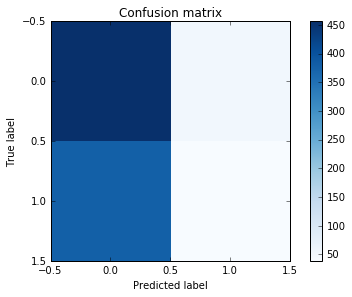

In [54]:
plot_confusion_matrix(cm)
plt.show()

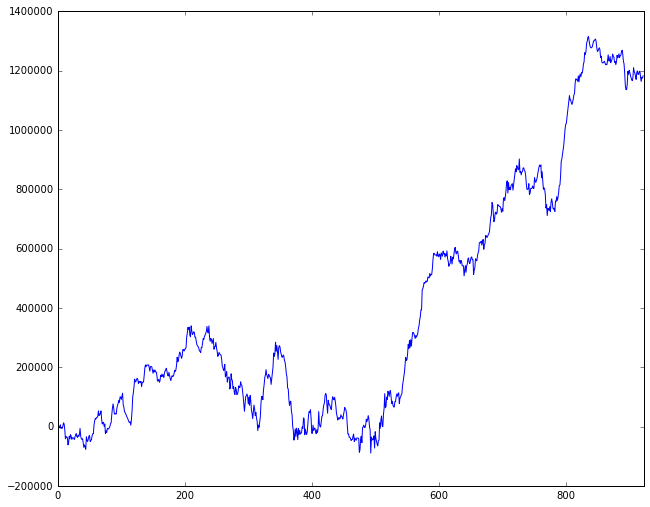

In [55]:
data_p = data[['Close','Open']][(4621-n):4622].values
data_p1 = pd.DataFrame(data_p,columns = ['Close','Open'])
result = np.c_[prediction_1101_pandas['indexedLabel'],prediction_1101_pandas['prediction']]
result1 = pd.DataFrame(result , columns = ['test', 'prediction'])
result2 = pd.concat([data_p1, result1], axis=1)
result2["Cl - Op"] = result2['Close'] - result2['Open']
result2['prediction'] = result2['prediction'].replace(0,-1)
result2['profit'] = 1000*result2['Open'] * result2['Cl - Op'] * result2['prediction']
a = result2['profit'].cumsum()
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
a.plot()

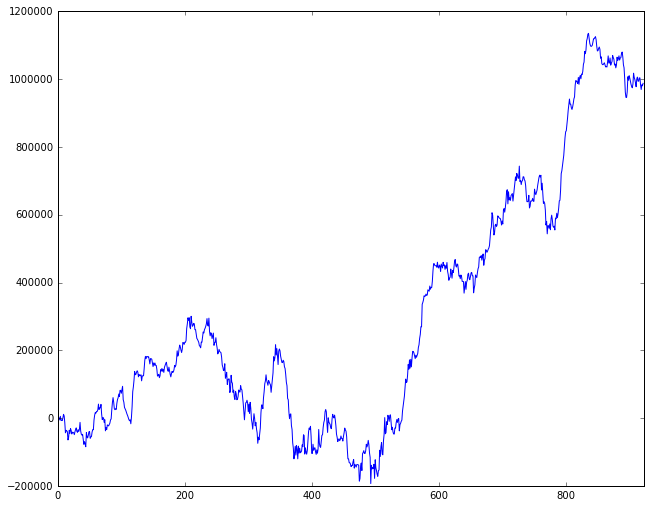

In [56]:
result2['processing fee1'] = np.where(result2['prediction'] == 1,1000*(result2['Close']*(4.425/1000.0) + result2['Open']*(1.425/1000.0))*1
                                      ,1000*(result2['Close']*(1.425/1000.0) + result2['Open']*(4.425/1000.0)))
result2['profit_r_fee'] = result2['profit'] -  result2['processing fee1']
b = result2['profit_r_fee'].cumsum()
from IPython.core.pylabtools import figsize
figsize(10.5, 8.5)
b.plot()

In [57]:
result2.head(5)

,Close,Open,test,prediction,Cl - Op,profit,processing fee1,profit_r_fee
0,28.76,28.67,1.0,-1.0,0.09,-2580.3,167.84775,-2748.14775
1,28.67,28.76,1.0,-1.0,-0.09,2588.4,168.11775,2420.28225
2,28.63,28.67,0.0,-1.0,-0.04,1146.8,167.66250,979.13750
3,28.29,28.50,0.0,1.0,-0.21,-5985.0,165.79575,-6150.79575
4,27.95,28.33,0.0,-1.0,-0.38,10765.4,165.18900,10600.21100


In [58]:
a = result2[['Close','Open','test','prediction','Cl - Op','profit','profit_r_fee']]

In [59]:
a.head()

,Close,Open,test,prediction,Cl - Op,profit,profit_r_fee
0,28.76,28.67,1.0,-1.0,0.09,-2580.3,-2748.14775
1,28.67,28.76,1.0,-1.0,-0.09,2588.4,2420.28225
2,28.63,28.67,0.0,-1.0,-0.04,1146.8,979.13750
3,28.29,28.50,0.0,1.0,-0.21,-5985.0,-6150.79575
4,27.95,28.33,0.0,-1.0,-0.38,10765.4,10600.21100


In [60]:
a.to_csv('1101outcome',sep = ',',encoding='utf-8')